In [7]:
"""FC3 Genetic Alorithm from El Rosario to Consulado"""

import random
from typing import List, Tuple
import rutas as rutas
from rutas import *
from values import *

In [8]:

Genome = Tuple[List[int], int, List[str], List[Tuple[str, str]]]
# List of num_ruta, time, lineas, stages

def generate_genome(rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    current_point = start_point
    num_ruta = []
    stages = []
    while current_point != end_point:
        available_routes = [i for i, ruta in enumerate(rutas) if current_point == ruta.start]
        i = random.choice(available_routes)
        num_ruta.append(i)
        next_point = rutas[i].end
        stages.append((current_point, next_point))
        current_point = next_point
    time = sum(rutas[i].time for i in num_ruta)
    lineas = [rutas[i].linea for i in num_ruta]
    return time, lineas, stages, num_ruta 

genome = generate_genome(rutas, start_point, end_point)
print(genome)

(397, ['7', '7', '7', '7', '1', '3', '3', '3', '3', '12', '12', '3', '3', '3', '9', '7', '7', '2', '2', '7', '7', '2', '3', '1', '9', '3', '3', '3', '3', '2', '8', '1', '3', '2', '2', '2', '9', '9', '8', '12', '12', '3', '3', '12', '12', '12', '7', '2', '2', '7', '7', '6', '5', '5', '6', '7', '7', '7', '7', '1', '3', '9', '8', '12', '12', '12', '12', '12', '12', '8', '2', '2', '8', '8', '2', '2', '2', '2', '9', '3', '1', '1', '1', '1', '3', '3', 'B', 'B', '3', '2', '2', '2', '8', '12', '2', '2', '12', '12', '12', '8', '2', '2', '9', '9', '9', '9', '8', '8', '8', '8', '8', 'B', '4', '4', 'B', 'B', '4', '4', '9', '9', '9', '9', '9', '2', '1', '1', '1', '4', '4', '5', 'B'], [('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Mixcoac'), ('Mixcoac', 'Tacubaya'), ('Tacubaya', 'Balderas'), ('Balderas', 'Centro Médico'), ('Centro Médico', 'Zapata'), ('Zapata', 'Centro Médico'), ('Centro Médico', 'Zapata'), ('Zapata', 'Mixcoac'), ('Mixcoac', 'Zapata'), ('Zapata', 'Universidad'), ('

In [9]:
# Population
Population = List[Genome]

def generate_population(rutas: List[Ruta], size_pop) -> Population:
    return [generate_genome(rutas, start_point, end_point) for _ in range(size_pop)]

population = generate_population(rutas, size_pop)
print('\n'.join(map(str, population)))

(91, ['6', '5', '5', '6', '7', '7', '2', '2', '2', '2', '2', '3', '3', '2', '2', '3', '1', '2', '2', '2', '2', '2', '3', 'B', 'B', '3', '2', '2', '3', '3', '5', '5', 'B', 'B', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Hidalgo'), ('Hidalgo', 'Bellas Artes'), ('Bellas Artes', 'Hidalgo'), ('Hidalgo', 'Bellas Artes'), ('Bellas Artes', 'Hidalgo'), ('Hidalgo', 'Guerrero'), ('Guerrero', 'Hidalgo'), ('Hidalgo', 'Bellas Artes'), ('Bellas Artes', 'Hidalgo'), ('Hidalgo', 'Balderas'), ('Balderas', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Hidalgo'), ('Hidalgo', 'Guerrero'), ('Guerrero', 'Garibaldi'), ('Garibaldi', 'Guerrero'), ('Guerrero', 'Hidalgo'), ('Hidalgo', 'Tacubaya'), ('Tacubaya', 'Hidalgo')

In [10]:
def fitness(genome: Genome, rutas: List[Ruta]) -> float:
    value = 1/genome[0]
    return value

In [11]:
def elitism(population: Population, rutas: List[Ruta], elite_size: int) -> Population:
    fitness_values = [(genome, fitness(genome, rutas)) for genome in population]
    sorted_by_fitness = sorted(fitness_values, key=lambda x: x[1], reverse=True)
    elite = [genome for genome in sorted_by_fitness[:elite_size]]
    return elite, fitness_values, sorted_by_fitness

elite, fitness_values, sorted_by_fitness = elitism(population, rutas, elite_size)

print("\nFitness values:")
for i, genome in enumerate(population):
    print(fitness_values[i][1])

print("\nFitness values afer sorting:")
for i, genome in enumerate(population):
    print(sorted_by_fitness[i][1])

print("\nBest genomes:")
for genome in elite:
    print(genome)


Fitness values:
0.01098901098901099
0.0016778523489932886
0.009009009009009009
0.03571428571428571
0.014285714285714285

Fitness values afer sorting:
0.03571428571428571
0.014285714285714285
0.01098901098901099
0.009009009009009009
0.0016778523489932886

Best genomes:
((28, ['6', '5', '3', '3', '3', '6', '4', '4', '4', '4', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Guerrero'), ('Guerrero', 'La Raza'), ('La Raza', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Morelos'), ('Morelos', 'San Lázaro')], [31, 27, 16, 71, 70, 33, 22, 77, 22, 23, 52]), 0.03571428571428571)


No tengo idea como hacer el crossover, supongo que cuando haya un punto en comun, pero pueden tomar muchos muchos muchos caminos, mejor solo usamos elitismo

In [12]:

def mutate_genome(genome: Genome, rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    # Choose a random index to mutate
    index_to_mutate = random.randint(1, len(genome[3]) - 1)
    new_start_point = rutas[genome[3][index_to_mutate - 1]].end
    # Generate a new route
    new_route = generate_genome(rutas, new_start_point, end_point)

    # Create the new genome
    new_genome = list(genome)
    
    new_genome[3] = new_genome[0][:index_to_mutate] + new_route[0]
    new_genome[0] = sum(rutas[i].time for i in new_genome[0])
    new_genome[1] = [rutas[i].linea for i in new_genome[0]]
    new_genome[2] = [(rutas[i].start, rutas[i].end) for i in new_genome[0]]

    return (new_genome)

print("\nOriginal genome:")
print(population[0])

print("\nMutated genome:")
print(mutate_genome(population[0], rutas, start_point, end_point))



Original genome:
(91, ['6', '5', '5', '6', '7', '7', '2', '2', '2', '2', '2', '3', '3', '2', '2', '3', '1', '2', '2', '2', '2', '2', '3', 'B', 'B', '3', '2', '2', '3', '3', '5', '5', 'B', 'B', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'El Rosario'), ('El Rosario', 'Tacuba'), ('Tacuba', 'Tacubaya'), ('Tacubaya', 'Hidalgo'), ('Hidalgo', 'Bellas Artes'), ('Bellas Artes', 'Hidalgo'), ('Hidalgo', 'Bellas Artes'), ('Bellas Artes', 'Hidalgo'), ('Hidalgo', 'Guerrero'), ('Guerrero', 'Hidalgo'), ('Hidalgo', 'Bellas Artes'), ('Bellas Artes', 'Hidalgo'), ('Hidalgo', 'Balderas'), ('Balderas', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Cuatro Caminos'), ('Cuatro Caminos', 'Tacubaya'), ('Tacubaya', 'Hidalgo'), ('Hidalgo', 'Guerrero'), ('Guerrero', 'Garibaldi'), ('Garibaldi', 'Guerrero'), ('Guerrero', 'Hidalgo'), ('Hidalgo', 'Tacubaya'), ('Tac

TypeError: 'int' object is not subscriptable

In [ ]:
def mutate_best_genome(population: Population, rutas: List[Ruta], start_point: str, end_point: str) -> Genome:
    # Calculate fitness scores for the population
    fitness_scores = [fitness(genome, rutas) for genome in population]
    # Identify the genome with the best fitness score
    best_genome = population[fitness_scores.index(max(fitness_scores))]
    # Mutate the best genome
    mutated_best_genome = mutate_genome(best_genome, rutas, start_point, end_point)

    return mutated_best_genome

print("Original best genome: ")
print(elite[0])

print("\nMutated genome with best fitness score:")
print(mutate_best_genome(population, rutas, start_point, end_point))

Original best genome: 
(([31, 32, 33, 22, 29, 30, 61, 6, 85, 108], 29, ['6', '6', '6', '4', '5', '5', '1', '1', '5', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Pantitlán'), ('Pantitlán', 'Gómez Farías'), ('Gómez Farías', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'San Lázaro')], " El tiempo fue de: 29, Rutas disponibles tomadas: [31, 32, 33, 22, 29, 30, 61, 6, 85, 108], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Pantitlán'), ('Pantitlán', 'Gómez Farías'), ('Gómez Farías', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'San Lázaro')], en las lineas: ['6', '6', '6', '4', '5', '5', '1', '1', '5', 'B'],"), 0.03

In [13]:
mutation_rate = 1
def create_new_population(population: Population, rutas: List[Ruta], elite_size: int, mutation_rate: float) -> Population:
    # Select the elite individuals
    elite = elitism(population, rutas, elite_size)
    # Generate mutations of the elite individuals
    mutations = [mutate_genome(genome, rutas, start_point, end_point) for genome in elite if random.random() < mutation_rate]
    # Create the new population
    new_population = list(elite) + mutations
    return new_population

new_population = create_new_population(population, rutas, elite_size, mutation_rate)

print("\nNew population:")
print('\n'.join(map(str, new_population)))



IndexError: list index out of range

In [ ]:
def create_new_population(population: Population, rutas: List[Ruta], elite_size: int, mutation_rate: float) -> Population:
    # Select the elite individuals
    elite, fitness_values, sorted_by_fitness = elitism(population, rutas, elite_size)
    random_genomes = [generate_genome(rutas, start_point, end_point) for _ in range(size_pop - len(elite))]
    
    new_population = (elite) + random_genomes
    return new_population

new_population = create_new_population(population, rutas, elite_size, mutation_rate)

print("\nNew population:")
for genome in new_population:
    print(genome)

print("Size of the new population:", len(new_population))
print("Size of the original population:", len(population))


New population:
(([31, 32, 33, 22, 29, 30, 61, 6, 85, 108], 29, ['6', '6', '6', '4', '5', '5', '1', '1', '5', 'B'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Pantitlán'), ('Pantitlán', 'Gómez Farías'), ('Gómez Farías', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'San Lázaro')], " El tiempo fue de: 29, Rutas disponibles tomadas: [31, 32, 33, 22, 29, 30, 61, 6, 85, 108], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'Deportivo 18 de Marzo'), ('Deportivo 18 de Marzo', 'Martín Carrera'), ('Martín Carrera', 'Consulado'), ('Consulado', 'Oceanía'), ('Oceanía', 'Pantitlán'), ('Pantitlán', 'Gómez Farías'), ('Gómez Farías', 'Pantitlán'), ('Pantitlán', 'Oceanía'), ('Oceanía', 'San Lázaro')], en las lineas: ['6', '6', '6', '4', '5', '5', '1', '1', '5', 'B'],"), 0.03448275


Final population:
((((((((((((([31, 27, 16, 50, 38, 39, 94, 10, 3, 4], 22, ['6', '5', '3', 'B', '8', '8', '8', '2', '1', '1'], [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Guerrero'), ('Guerrero', 'Garibaldi'), ('Garibaldi', 'Bellas Artes'), ('Bellas Artes', 'Salto del Agua'), ('Salto del Agua', 'Bellas Artes'), ('Bellas Artes', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], " El tiempo fue de: 22, Rutas disponibles tomadas: [31, 27, 16, 50, 38, 39, 94, 10, 3, 4], Las estaciones fueron de: [('El Rosario', 'Instituto del Petroleo'), ('Instituto del Petroleo', 'La Raza'), ('La Raza', 'Guerrero'), ('Guerrero', 'Garibaldi'), ('Garibaldi', 'Bellas Artes'), ('Bellas Artes', 'Salto del Agua'), ('Salto del Agua', 'Bellas Artes'), ('Bellas Artes', 'Pino Suárez'), ('Pino Suárez', 'Candelaria'), ('Candelaria', 'San Lázaro')], en las lineas: ['6', '5', '3', 'B', '8', '8', '8', '2', '1', '1'],"), 0.045454545454545456)

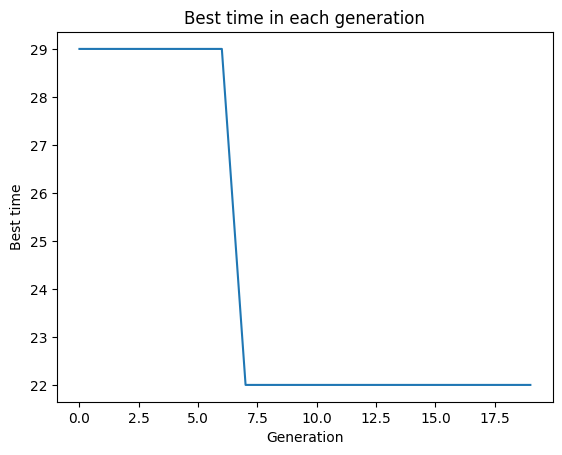

bests times:  [29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 22, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]


In [ ]:
import matplotlib.pyplot as plt

def genetic_algorithm(rutas: List[Ruta], population: Population, num_generations: int, elite_size: int, mutation_rate: float):
    best_times = []
    for _ in range(num_generations):
        # Create a new population
        population = create_new_population(population, rutas, elite_size, mutation_rate)
        
        # Mutate the population
        for i in range(len(population)):
            if random.random() < mutation_rate:
                population[i] = mutate_genome(population[i], rutas, start_point, end_point)
                
        # Find the best time in this generation and add it to the list
        best_genome = max(population, key=lambda genome: fitness(genome, rutas))
        time = best_genome[1]
        best_times.append(1/time if time < 1 else time)
                
    # Return the final population and the list of best times
    return population, best_times

# Run the genetic algorithm
final_population, best_times = genetic_algorithm(rutas, population, num_generations, elite_size, mutation_rate)

# Print the final population
print("\nFinal population:")
for genome in final_population:
    print(genome)

# Print the best genome
best_genome = max(final_population, key=lambda genome: fitness(genome, rutas))
print("\nBest genome:")
print(best_genome)

# Plot the best times
plt.plot(best_times)
plt.title('Best time in each generation')
plt.xlabel('Generation')
plt.ylabel('Best time')
plt.show()

print("bests times: ", best_times)